# Data Cleaning 

#### 1. Import pandas library.

In [6]:
import pandas as pd

#### 2. Import pymysql and sqlalchemy as you have learnt in the lesson of importing/exporting data. 


In [7]:
import pymysql 
from sqlalchemy import create_engine

#### 3. Create a mysql engine to set the connection to the server. Check the connection details in [this link](https://relational.fit.cvut.cz/dataset/Stats).

In [8]:
username='guest'
password ='relational'
host = 'relational.fit.cvut.cz:3306'
database ='stats'
engine = create_engine(f"""mysql+pymysql://{username}:{password}@{host}/{database}""")

#### 4. Import the users table.

In [40]:
df_userid = pd.read_sql_query('SELECT * FROM stats.users', engine)

#### 5. Rename Id column to userId.

In [41]:
df_userid.rename(columns={'Id':'userID'},inplace=True)

#### 6. Import the posts table. 

In [35]:
df_posts = pd.read_sql_query('SELECT * FROM stats.posts', engine)

#### 7. Rename Id column to postId and OwnerUserId to userId.

In [39]:
df_posts.rename(columns={'Id':'postID','OwnerUserId':'userID'},inplace=True)
df_posts.head()

,postID,PostTypeId,AcceptedAnswerId,CreaionDate,Score,ViewCount,Body,userID,LasActivityDate,Title,...,AnswerCount,CommentCount,FavoriteCount,LastEditorUserId,LastEditDate,CommunityOwnedDate,ParentId,ClosedDate,OwnerDisplayName,LastEditorDisplayName
0,1,1,15.0,2010-07-19 19:12:12,23,1278.0,<p>How should I elicit prior distributions fro...,8.0,2010-09-15 21:08:26,Eliciting priors from experts,...,5.0,1,14.0,NaN,NaT,NaT,NaN,NaT,None,None
1,2,1,59.0,2010-07-19 19:12:57,22,8198.0,<p>In many different statistical methods there...,24.0,2012-11-12 09:21:54,What is normality?,...,7.0,1,8.0,88.0,2010-08-07 17:56:44,NaT,NaN,NaT,None,None
2,3,1,5.0,2010-07-19 19:13:28,54,3613.0,<p>What are some valuable Statistical Analysis...,18.0,2013-05-27 14:48:36,What are some valuable Statistical Analysis op...,...,19.0,4,36.0,183.0,2011-02-12 05:50:03,2010-07-19 19:13:28,NaN,NaT,None,None
3,4,1,135.0,2010-07-19 19:13:31,13,5224.0,<p>I have two groups of data. Each with a dif...,23.0,2010-09-08 03:00:19,Assessing the significance of differences in d...,...,5.0,2,2.0,NaN,NaT,NaT,NaN,NaT,None,None
4,5,2,NaN,2010-07-19 19:14:43,81,NaN,"<p>The R-project</p>\n\n<p><a href=""http://www...",23.0,2010-07-19 19:21:15,None,...,NaN,3,NaN,23.0,2010-07-19 19:21:15,2010-07-19 19:14:43,3.0,NaT,None,None


#### 8. Define new dataframes for users and posts with the following selected columns:
**users columns**: userId, Reputation, Views, UpVotes, DownVotes  
**posts columns**: postId, Score, userID, ViewCount, CommentCount

In [42]:
df_users2 = df_userid[['userID', 'Reputation', 'Views', 'UpVotes', 'DownVotes']]
df_posts2 = df_posts[['postID', 'Score', 'userID', 'ViewCount', 'CommentCount']]

#### 9. Merge the new dataframes you have created, of users and posts. 
You will need to make an inner [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) of posts and users dataframes.

In [45]:
dfs = df_users2.merge(df_posts2,how='inner',on='userID')
dfs.head()

,userID,Reputation,Views,UpVotes,DownVotes,postID,Score,ViewCount,CommentCount
0,-1,1,0,5007,1920,2175,0,NaN,0
1,-1,1,0,5007,1920,8576,0,NaN,0
2,-1,1,0,5007,1920,8578,0,NaN,0
3,-1,1,0,5007,1920,8981,0,NaN,0
4,-1,1,0,5007,1920,8982,0,NaN,0


#### 10. How many missing values do you have in your merged dataframe? On which columns?

In [47]:
dfs.isna().sum()

userID              0
Reputation          0
Views               0
UpVotes             0
DownVotes           0
postID              0
Score               0
ViewCount       48396
CommentCount        0
dtype: int64

#### 11. You will need to make something with missing values.  Will you clean or filling them? Explain. 
**Remember** to check the results of your code before going to the next step.

In [49]:
dfs.ViewCount.nunique()

3654

In [56]:
dfs[dfs.ViewCount.isna()].userID.nunique()

5959

In [60]:
dfs[dfs.ViewCount.isna()].userID
# droping rows that have userID == -1 (flag for internal use userid)
dfs.drop(dfs[dfs.userID==-1].index,inplace=True)

In [61]:
# calculate the number of posts per user without viewcount
dfs[dfs.ViewCount.isna()].userID.value_counts()

805      1712
686      1567
919      1200
11032     954
7290      821
         ... 
9001        1
32504       1
31522       1
30489       1
35515       1
Name: userID, Length: 5958, dtype: int64

In [62]:
dfs[dfs.userID==805]

,userID,Reputation,Views,UpVotes,DownVotes,postID,Score,ViewCount,CommentCount
8724,805,65272,5680,7035,143,1425,11,NaN,3
8725,805,65272,5680,7035,143,1723,8,NaN,4
8726,805,65272,5680,7035,143,1724,5,NaN,0
8727,805,65272,5680,7035,143,2434,2,NaN,4
8728,805,65272,5680,7035,143,2589,2,NaN,0
...,...,...,...,...,...,...,...,...,...
10439,805,65272,5680,7035,143,115332,1,NaN,0
10440,805,65272,5680,7035,143,115337,1,NaN,0
10441,805,65272,5680,7035,143,115354,2,NaN,0
10442,805,65272,5680,7035,143,115374,2,NaN,2


In [69]:
# replacing nan for 0 and creating a dummy value column where nan == 1
dfs.userID.value_counts()

805      1720
686      1598
919      1204
11032     966
7290      827
         ... 
53048       1
42805       1
34609       1
32558       1
10654       1
Name: userID, Length: 21982, dtype: int64

# Using dummies

In [71]:
dfs['was_missing'] = dfs.ViewCount.isna().astype(int)

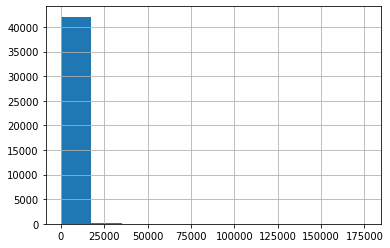

In [75]:
dfs.ViewCount.hist(bins=10)

In [76]:
dfs.ViewCount=dfs.ViewCount.fillna(0)

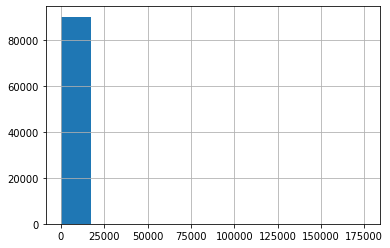

In [77]:
dfs.ViewCount.hist(bins=10)

In [79]:
dfs.describe()

,userID,Reputation,Views,UpVotes,DownVotes,postID,Score,ViewCount,CommentCount,was_missing
count,90373.000000,90373.000000,90373.000000,90373.000000,90373.00000,90373.000000,90373.000000,90373.000000,90373.000000,90373.000000
mean,16585.399920,6297.061014,1036.659898,724.339991,28.86818,56558.789019,2.787259,259.858697,1.899074,0.533179
std,15270.218327,15116.834946,2883.000130,2042.831900,99.59766,33856.925790,4.952869,1634.117664,2.640192,0.498901
min,5.000000,1.000000,0.000000,0.000000,0.00000,1.000000,-19.000000,0.000000,0.000000,0.000000
25%,3488.000000,61.000000,5.000000,1.000000,0.00000,26034.000000,1.000000,0.000000,0.000000,0.000000
50%,11075.000000,401.000000,46.000000,22.000000,0.00000,57266.000000,2.000000,0.000000,1.000000,1.000000
75%,27765.000000,4460.000000,515.000000,283.000000,8.00000,86184.000000,3.000000,112.000000,3.000000,1.000000
max,55746.000000,87393.000000,20932.000000,11442.000000,779.00000,115378.000000,192.000000,175495.000000,45.000000,1.000000


In [82]:
dfs.dtypes

userID            int64
Reputation        int64
Views             int64
UpVotes           int64
DownVotes         int64
postID            int64
Score             int64
ViewCount       float64
CommentCount      int64
was_missing       int32
dtype: object

In [83]:
dfs.ViewCount = dfs.ViewCount.astype(int)